In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy import stats
from collections import Counter
from sklearn.externals.six import StringIO
from IPython.display import Image
%matplotlib inline

In [2]:
DataClean = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/DataClean_wHRV.csv')

In [3]:
TargetClean = DataClean.oai0p

In [4]:
DataClean = DataClean.drop(['oai0p'],1)

In [5]:
DataClean = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/DataClean_wHRV1.csv')
DataClean = DataClean.drop(['date25','Unnamed: 0','nsrrid'], axis=1)

In [6]:
DataClean.head()

,educat,MStat,race,height,Hip,DiasBP,SystBP,INSULN1,ISTRD1,NTCA1,...,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
0,2.0,1.0,3.0,158.0,113.0,80.0,118.0,0.0,0.0,0.0,...,2.702046,2.415208,8.653223,7.333088,7.728508,7.127349,6.523125,0.604278,0.646622,-1.039934
1,2.0,1.0,1.0,170.0,104.0,90.0,130.0,0.0,0.0,0.0,...,2.744254,2.271610,9.097156,8.174134,8.197195,7.115964,6.253177,0.862831,0.703243,-1.214504
2,2.0,1.0,1.0,169.0,110.0,70.0,100.0,0.0,0.0,0.0,...,1.189388,0.642496,8.875093,8.573296,6.936051,6.321975,5.626567,0.695460,0.667169,-1.099820
3,2.0,2.0,3.0,145.0,96.0,74.0,134.0,0.0,0.0,0.0,...,1.827453,1.135394,8.407639,7.813450,7.107507,6.005193,5.942561,0.062721,0.515653,-0.724747
4,2.0,1.0,1.0,178.0,110.0,72.0,108.0,0.0,0.0,0.0,...,0.088688,-0.679029,7.919134,7.622380,6.152616,4.976327,4.511723,0.464671,0.614106,-0.951934


In [7]:
print(DataClean.shape)
print(TargetClean.shape)

(445, 91)
(445,)


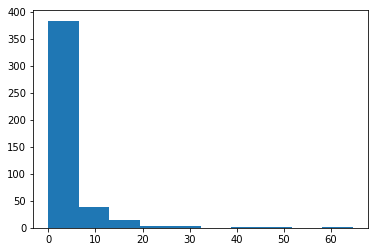

In [8]:
histTarget = plt.hist(TargetClean)

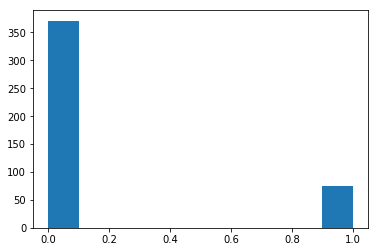

In [9]:
TargetCleanClass5 = []
for ii in range(TargetClean.shape[0]):
    if TargetClean[ii] < 5:
        TargetCleanClass5.append(0)
    else:
        TargetCleanClass5.append(1)
histTarget5 = plt.hist(TargetCleanClass5)

In [278]:
DataClean = DataClean[['Hip', 'ISTRD1', 'CRBRON15', 'PHLEGM15', 'SitRd02', 'HOSnr02', 'BEER10',
                    'COFFEE10', 'HvSnrd02', 'StpBrt02', 'age_s1', 'NECK20', 'gender', 'B','NN_RR', 
                     'AVNN', 'IHR','SDNN', 'SDANN', 'SDNNIDX', 'rMSSD', 'pNN10', 'pNN20', 'pNN30',
                     'pNN40', 'pNN50', 'tot_pwr', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF','LF_n', 'HF_n']]
y_train5 = TargetCleanClass5

In [279]:
DataClean.columns.values

array(['Hip', 'ISTRD1', 'CRBRON15', 'PHLEGM15', 'SitRd02', 'HOSnr02',
       'BEER10', 'COFFEE10', 'HvSnrd02', 'StpBrt02', 'age_s1', 'NECK20',
       'gender', 'B', 'NN_RR', 'AVNN', 'IHR', 'SDNN', 'SDANN', 'SDNNIDX',
       'rMSSD', 'pNN10', 'pNN20', 'pNN30', 'pNN40', 'pNN50', 'tot_pwr',
       'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'LF_n', 'HF_n'], dtype=object)

In [280]:
# Make a train/test split using 20% test size
X_train, X_test, y_train5, y_test5 , y_trainSW, y_testSW = train_test_split(
    DataClean, TargetCleanClass5,  TargetClean, test_size=0.35, random_state=42)

In [281]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X_train)
X_train = imp.transform(X_train)

mixmax = MinMaxScaler().fit(X_train)
X_train = mixmax.transform(X_train)

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X_test)
X_test = imp.transform(X_test)
X_test = mixmax.transform(X_test)

In [282]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

LReg = LogisticRegression(class_weight='balanced', C= 10)

rfecv = RFECV(estimator=LReg, step=1, cv=StratifiedKFold(10),
              scoring='roc_auc')
rfecv.fit(X_train, y_train5)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 34


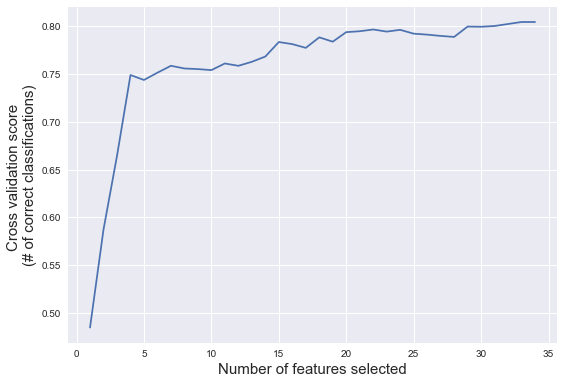

In [283]:
plt.figure()

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Number of features selected", fontsize= 15)
plt.ylabel("Cross validation score \n(# of correct classifications)", fontsize= 15)
plt.tight_layout()

plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/RFECV_LReg_wHRV.png',
           dpi = 300)

In [284]:
# LReg = LogisticRegression(class_weight='balanced')


# rfe = RFE(estimator=LReg, n_features_to_select=14, step=1)
# rfe.fit(X_train, y_train5)
# # ranking = rfe.ranking_.reshape(digits.images[0].shape)

In [285]:
idx = np.where(rfecv.ranking_ == 1)
# (array([ 0,  3,  8, 10, 11, 14, 22, 34, 37, 39, 44, 48]),)
idx

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),)

In [286]:
DataClean.columns.values[idx]

array(['Hip', 'ISTRD1', 'CRBRON15', 'PHLEGM15', 'SitRd02', 'HOSnr02',
       'BEER10', 'COFFEE10', 'HvSnrd02', 'StpBrt02', 'age_s1', 'NECK20',
       'gender', 'B', 'NN_RR', 'AVNN', 'IHR', 'SDNN', 'SDANN', 'SDNNIDX',
       'rMSSD', 'pNN10', 'pNN20', 'pNN30', 'pNN40', 'pNN50', 'tot_pwr',
       'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'LF_n', 'HF_n'], dtype=object)

In [287]:
X_train15 = X_train
X_test15 = X_test

In [288]:
X_train15 = X_train[:,rfecv.ranking_ == 1]
X_test15 = X_test[:,rfecv.ranking_ == 1]
# F2 score
# recall
# ROC curve

In [289]:
# clf = svm.SVC(class_weight='balanced',probability = True)
clf = LogisticRegression(class_weight='balanced')

In [290]:
ftwo_scorer = metrics.make_scorer(metrics.fbeta_score, beta=2)
Specificity_scorer = metrics.make_scorer(metrics.recall_score, pos_label=0)

In [291]:
scores = cross_val_score(clf,X_train15, y_train5, cv = 10, scoring = 'recall')
scores
print(np.mean(scores))

0.77


In [292]:
clf.fit(X_train15,y_train5)
y_predTrain = clf.predict(X_train15)

(0.0, 1.0)

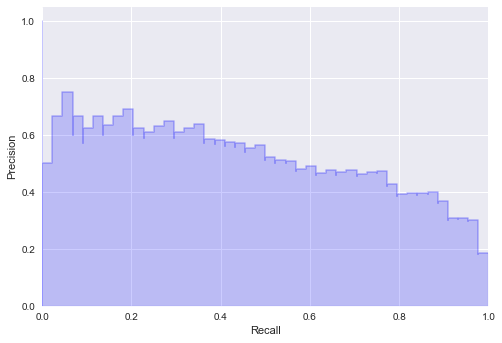

In [293]:
precision, recall, _ = metrics.precision_recall_curve(y_train5, clf.predict_proba(X_train15)[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#           average_precision))

In [294]:
confusion_matrix_train = confusion_matrix(y_train5, clf.predict(X_train15))
print(confusion_matrix_train)

[[184  61]
 [  5  39]]


In [295]:
recalltrain = metrics.recall_score(y_train5, y_predTrain)
precisiontrain = metrics.precision_score(y_train5, y_predTrain)
accuracytrain = metrics.accuracy_score(y_train5, y_predTrain)
f2train = metrics.fbeta_score(y_train5, y_predTrain, beta = 2)
print('recall: %.3f' % recalltrain)
print('precision: %.3f' % precisiontrain)
print('accuracy: %.3f' % accuracytrain)
print('F2: %.3f' % f2train)

recall: 0.886
precision: 0.390
accuracy: 0.772
F2: 0.707


In [296]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1','l2']
C = [0.001,0.01,0.1,1,10,100]
# Create the random grid
parameters = {'penalty': penalty,
               'C': C,}
print(parameters)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [297]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
LReg = LogisticRegression(class_weight='balanced', max_iter = 500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
LReg_GridCV = GridSearchCV(LReg, parameters, scoring = 'roc_auc', cv = 5, verbose=0, n_jobs = -1)
# Fit the random search model
LReg_GridCV.fit(X_train15, y_train5)
LReg_GridCV.best_params_

{'C': 1, 'penalty': 'l2'}

In [298]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1','l2']
C = [.3,.5,1,2.5,5.0]
# C = [3,5,10,25,50]
# C = [30,50,100,250,500]
# C = [.30,.50,1.00,2.50,5.00]


# Create the random grid
parameters = {'penalty': penalty,
               'C': C,}
print(parameters)

{'penalty': ['l1', 'l2'], 'C': [0.3, 0.5, 1, 2.5, 5.0]}


In [299]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
LReg = LogisticRegression(class_weight='balanced', max_iter = 500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
LReg_GridCV = GridSearchCV(LReg, parameters, scoring = 'roc_auc', cv = 5, verbose=0, n_jobs = -1)
# Fit the random search model
LReg_GridCV.fit(X_train15, y_train5)
LReg_GridCV.best_params_

{'C': 1, 'penalty': 'l2'}

In [246]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1','l2']
# C = [15,20,30,42,45]
C = [30,40,50,60,70]
# C = [.30,.40,.50,.60,.70]
# Create the random grid
parameters = {'penalty': penalty,
               'C': C,}
print(parameters)

{'penalty': ['l1', 'l2'], 'C': [30, 40, 50, 60, 70]}


In [247]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
LReg = LogisticRegression(class_weight='balanced', max_iter = 500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
LReg_GridCV = GridSearchCV(LReg, parameters, scoring = 'roc_auc', cv = 5, verbose=0, n_jobs = -1)
# Fit the random search model
LReg_GridCV.fit(X_train15, y_train5)
LReg_GridCV.best_params_

{'C': 50, 'penalty': 'l2'}

In [300]:
LReg_GridCV.best_params_

{'C': 1, 'penalty': 'l2'}

In [301]:
# clf = svm.SVC(class_weight='balanced',probability = True)
clfTuned = LReg_GridCV.best_estimator_

In [302]:
clfTuned.fit(X_train15,y_train5)
y_predTrain = clfTuned.predict(X_train15)

In [303]:
recalltrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 5, n_jobs = -1, scoring = 'recall')
specificitytrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 5, n_jobs = -1, scoring = Specificity_scorer)
precisiontrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 5, n_jobs = -1, scoring = 'precision')
accuracytrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 5, n_jobs = -1, scoring = 'accuracy')
f2train = cross_val_score(clfTuned,X_train15, y_train5, cv = 5, n_jobs = -1, scoring = ftwo_scorer)

In [304]:
print('recall: %.3f' % np.mean(recalltrain))
print('specificity: %.3f' % np.mean(specificitytrain))
print('precision: %.3f' % np.mean(precisiontrain))
print('accuracy: %.3f' % np.mean(accuracytrain))
print('F2: %.3f' % np.mean(f2train))

recall: 0.772
specificity: 0.739
precision: 0.355
accuracy: 0.744
F2: 0.616


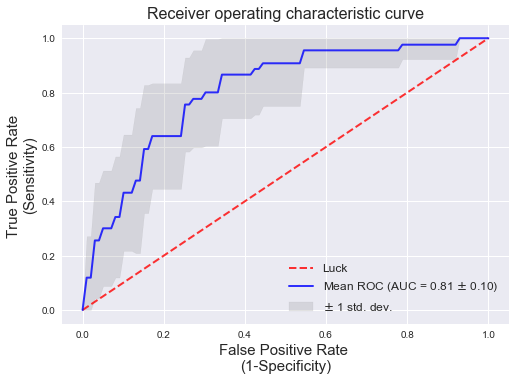

In [305]:
from scipy import interp
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

n_samples, n_features = X_train15.shape
y_train5 = np.asarray(y_train5)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = LReg_GridCV.best_estimator_

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_train15, y_train5):
    probas_ = classifier.fit(X_train15[train], y_train5[train]).predict_proba(X_train15[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train5[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate \n(1-Specificity)', fontsize= 15)
plt.ylabel('True Positive Rate \n(Sensitivity)', fontsize= 15)
plt.title('Receiver operating characteristic curve', fontsize= 16)
plt.legend(loc="lower right", fontsize= 12)
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/ROC_LReg_train_wHRV.png',
           dpi = 300)

In [306]:
y_predTest = clfTuned.predict(X_test15)

In [307]:
recalltest = metrics.recall_score(y_test5, y_predTest)
precisiontest = metrics.precision_score(y_test5, y_predTest)
accuracytest = metrics.accuracy_score(y_test5, y_predTest)
f2test = metrics.fbeta_score(y_test5, y_predTest, beta = 2)
print('recall: %.3f' % recalltest)
print('precision: %.3f' % precisiontest)
print('accuracy: %.3f' % accuracytest)
print('F2: %.3f' % f2test)

recall: 0.767
precision: 0.411
accuracy: 0.744
F2: 0.653


In [308]:
CM_clfTuned_test = confusion_matrix(y_test5, y_predTest)

In [309]:
CM_clfTuned_test

array([[93, 33],
       [ 7, 23]])

In [310]:
print(metrics.classification_report(y_test5, clfTuned.predict(X_test15)))

             precision    recall  f1-score   support

          0       0.93      0.74      0.82       126
          1       0.41      0.77      0.53        30

avg / total       0.83      0.74      0.77       156



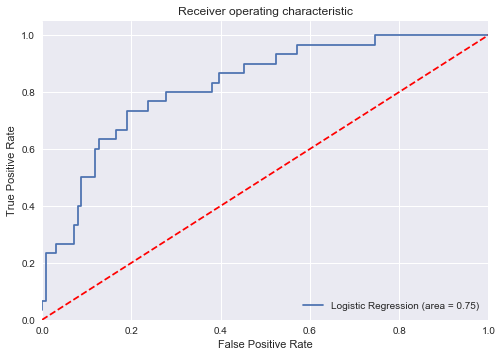

In [312]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test5, clfTuned.predict(X_test15))
fpr, tpr, thresholds = roc_curve(y_test5, clfTuned.predict_proba(X_test15)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/ROC_LReg_wHRV_test.png')

/Users/hurdleman/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/hurdleman/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/hurdleman/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/hurdleman/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/hurdleman/anaconda/lib/python

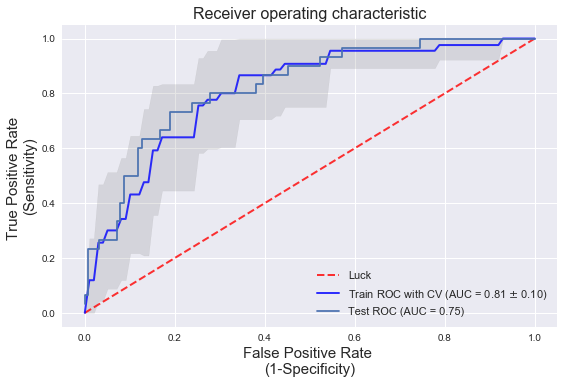

In [313]:
from scipy import interp
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

n_samples, n_features = X_train15.shape
y_train5 = np.asarray(y_train5)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = LReg_GridCV.best_estimator_

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_train15, y_train5):
    probas_ = classifier.fit(X_train15[train], y_train5[train]).predict_proba(X_train15[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train5[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.hold(True)


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Train ROC with CV (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
logit_roc_auc = roc_auc_score(y_test5, clfTuned.predict(X_test15))
fpr, tpr, thresholds = roc_curve(y_test5, clfTuned.predict_proba(X_test15)[:,1])
plt.plot(fpr, tpr, label='Test ROC (AUC = %0.2f)' % logit_roc_auc)
plt.hold(False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate \n(1-Specificity)', fontsize= 15)
plt.ylabel('True Positive Rate \n(Sensitivity)', fontsize= 15)
plt.title('Receiver operating characteristic', fontsize= 16)
plt.legend(loc="lower right", fontsize= 11)
plt.tight_layout()
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/ROC_LReg_wHRV_Overlay.png',
           dpi = 300)

In [ ]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8